In [17]:
import _init_paths
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.channel import Channel
import matplotlib.pyplot as plt

In [18]:
global_time = 0
channel = Channel(global_time, [])

In [19]:
station_num = 5
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

In [20]:
for i in range(station_num):
    station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    stations_list.append(station)

In [21]:
for i in range(1000):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

In [22]:
for station in stations_list:
    total_time += station.total_pkt_time

In [23]:
throughput = total_time/channel.time * data_rate * 1500 / 1560

In [24]:
total_time

624.0

In [25]:
throughput

3.2936870997255263

In [26]:
total_time_channel_start = 0
total_time_channel_end = 0

In [27]:
len(channel.start)

7

In [28]:
for i in range(len(channel.start)):
    if(i > 0):
        if (channel.start[i] == channel.start[i-1]):
            continue
    if(i < (len(channel.start)-1)):
        if(channel.start[i] == channel.start[i+1]):
            continue
    total_time_channel_start += frame_len
    
for i in range(len(channel.end)):
    if(i > 0):
        if (channel.end[i] == channel.end[i-1]):
            continue
    if(i < (len(channel.start)-1)):
        if (channel.end[i] == channel.end[i+1]):
            continue
    total_time_channel_end += frame_len

In [29]:
total_time_channel_end

624.0

[8, 216]
[0, 0]
[224, 432]
[1, 1]
[224, 432]
[3, 3]
[442, 650]
[2, 2]
[442, 650]
[4, 4]
[659, 867]
[0, 0]
[880, 1088]
[2, 2]


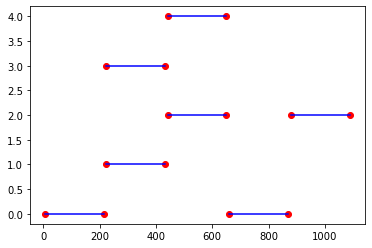

In [30]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

[8, 216]
[1, 1]


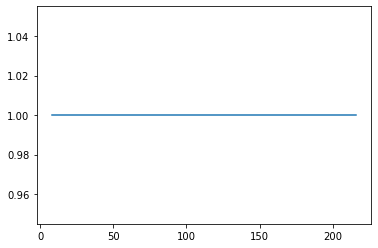

In [31]:
x=[channel.start[0],channel.end[0]]
print(x)
y= [1,1]
print(y)
plt.plot(x, y)

In [32]:
channel.start

[8, 224, 224, 442, 442, 659, 880]

In [33]:
frame_len

208.0

In [35]:
stations_list[2].history

[['IDLE', 0, 'null'],
 ['IDLE', 0, 'null'],
 ['IDLE', 0, 'null'],
 ['IDLE', 0, 'null'],
 ['IDLE', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 0, 'null'],
 ['BUSY', 

In [19]:
station.ack_time

[1130.0]

In [20]:
observation

NameError: name 'observation' is not defined